In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
df = pd.read_excel('data\\data_lab1.xlsx', sheet_name='2,18')

df.dropna(inplace=True)

df

,Диурез,t36,t35,t34,t33,t32
0,1,50,50,60,80,130
1,2,45,45,60,85,150
2,3,45,45,60,80,150
3,4,50,50,55,90,200
4,5,50,50,55,85,110
5,6,50,40,60,85,120
6,7,45,50,55,80,120
7,8,45,50,55,90,130
8,9,50,55,60,85,150
9,10,50,50,60,85,150


In [12]:
X = df.copy()
X = X[['t36','t35','t34','t33','t32']]
X_st = (X - X.mean()) / X.std(ddof=1)
X

,t36,t35,t34,t33,t32
0,50,50,60,80,130
1,45,45,60,85,150
2,45,45,60,80,150
3,50,50,55,90,200
4,50,50,55,85,110
5,50,40,60,85,120
6,45,50,55,80,120
7,45,50,55,90,130
8,50,55,60,85,150
9,50,50,60,85,150


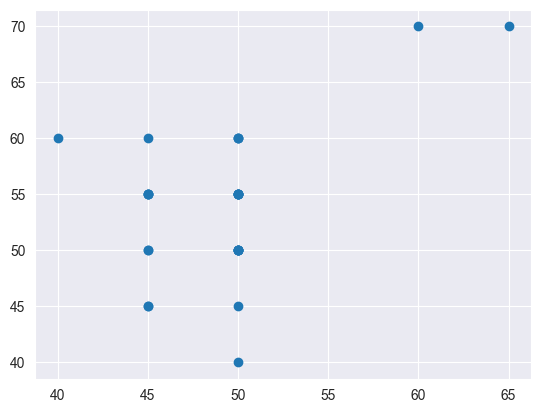

In [13]:
plt.scatter(df["t36"],df["t35"])

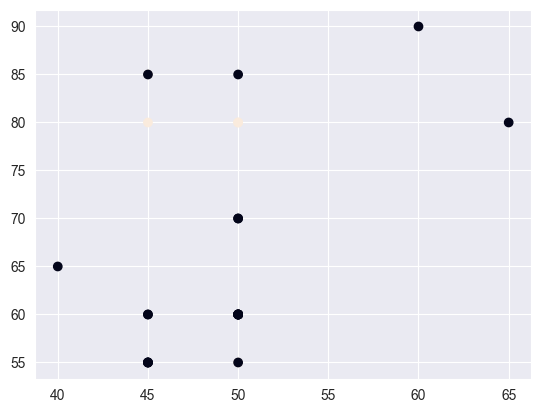

In [14]:
kmeans = KMeans(n_clusters=2, init="random", n_init=10)
kmeans.fit(X)
df['y_kmeans'] = kmeans.labels_

plt.scatter(df["t36"],df["t34"], c=df['y_kmeans'])

C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

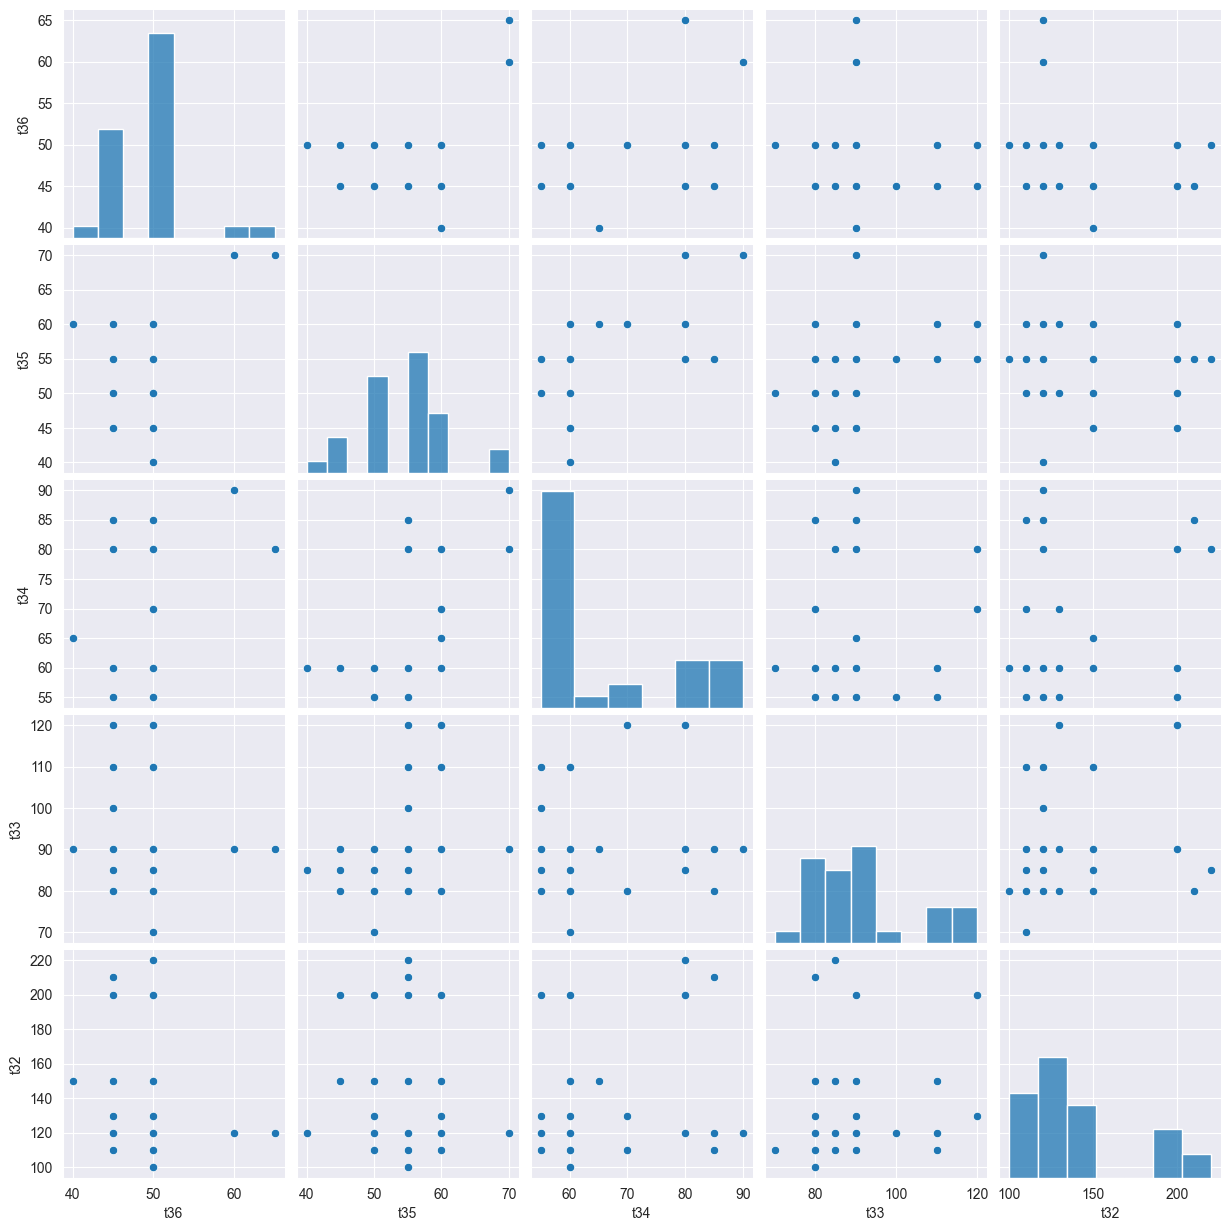

In [15]:
sns.pairplot(X)

In [16]:
df["y_kmeans"] = 1
df.head()

,Диурез,t36,t35,t34,t33,t32,y_kmeans
0,1,50,50,60,80,130,1
1,2,45,45,60,85,150,1
2,3,45,45,60,80,150,1
3,4,50,50,55,90,200,1
4,5,50,50,55,85,110,1


<Axes: >

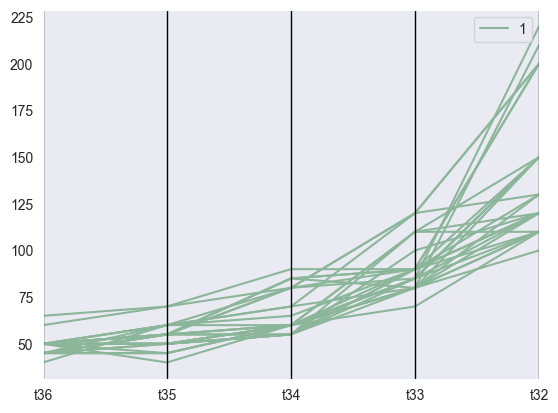

In [17]:
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=X.columns)

<Axes: >

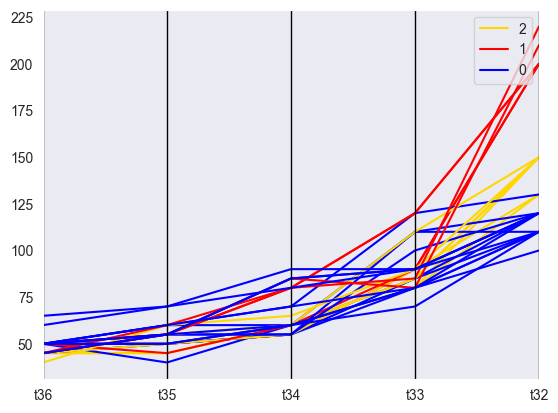

In [21]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
df['y_kmeans'] = kmeans.labels_

colors = ('gold', 'red', 'blue', 'green','hotpink')
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=X.columns, color=colors)

C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

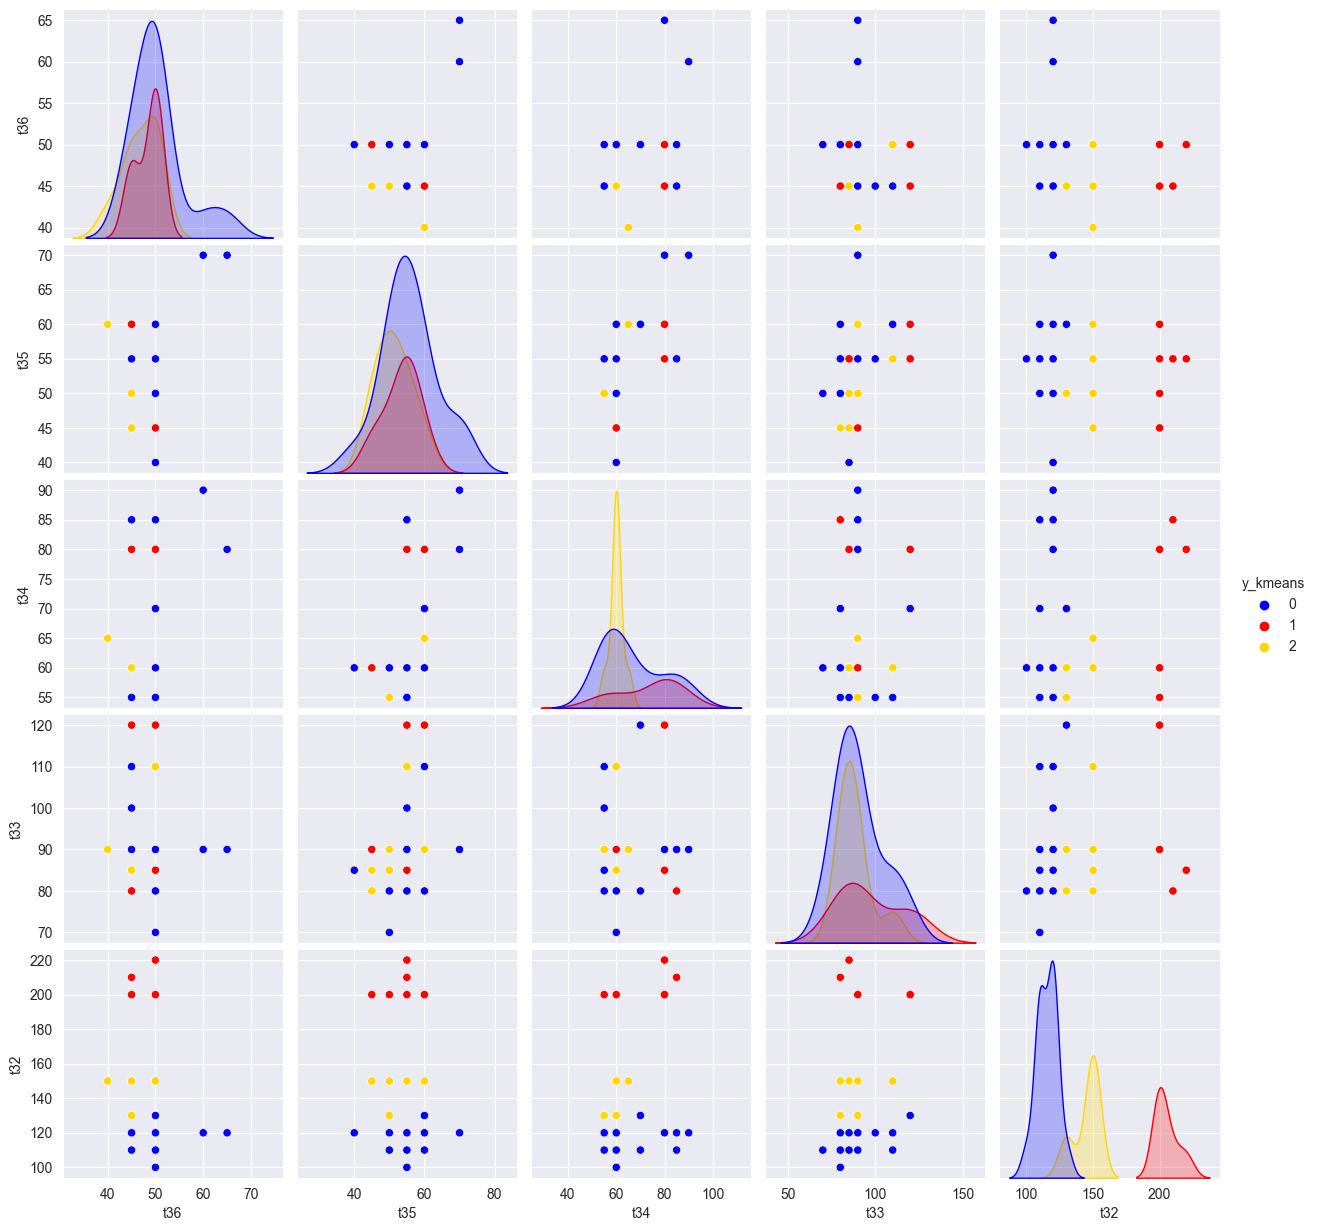

In [23]:
sns.pairplot(df, hue='y_kmeans', vars=X.columns, palette=dict(zip(df['y_kmeans'].unique(), colors[:df['y_kmeans'].nunique()])))